In [1]:
import torch

In [1]:
path = "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log"


# CIFAR100

## クラス増加

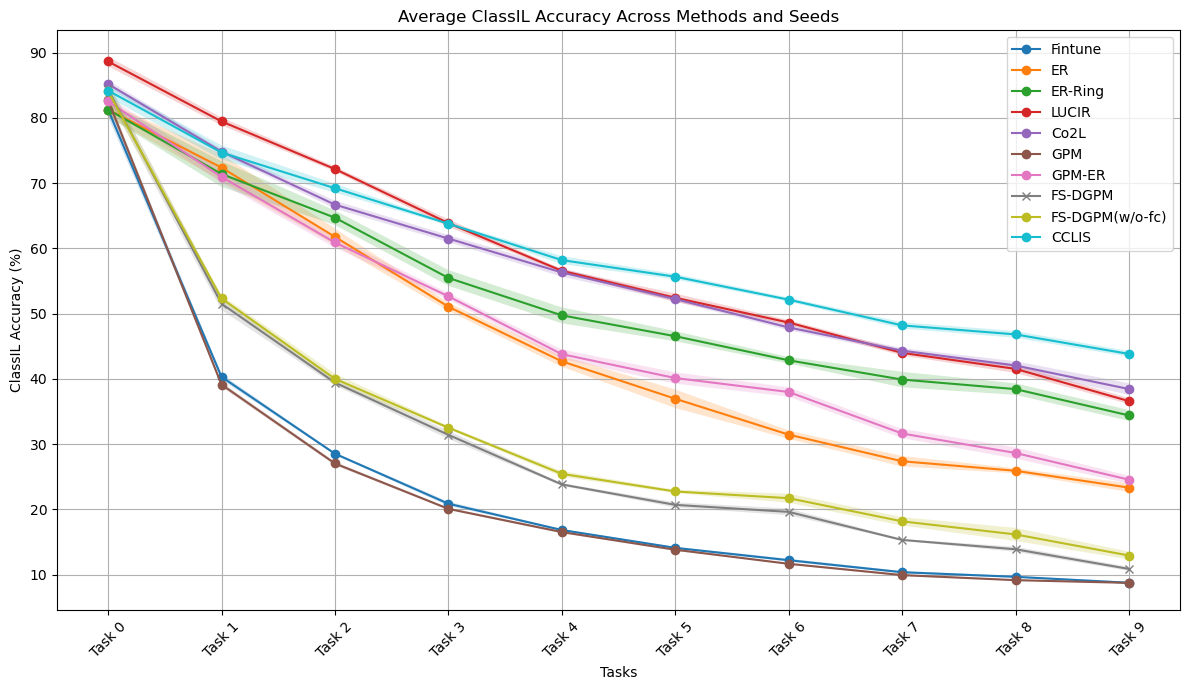

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義（とりあえずseed値5回変更）
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM-ER': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'FS-DGPM': [
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed0_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed1_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed2_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed3_date2025_04_16/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed4_date2025_04_16/exp_log/experiment.log",
    ],
    'FS-DGPM(w/o-fc)': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed0_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed1_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed2_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed3_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed4_date2025_04_17/exp_log/experiment.log",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar100_seed0_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar100_seed1_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar100_seed2_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar100_seed3_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar100_seed4_date2025_04_20/exp_log/experiment.log",
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    # plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')
    # 各手法の平均精度をプロット
    if method_name == "FS-DGPM":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
import re
import numpy as np

# 手法ごとのログファイルパス（既に与えられているものを使用）
# method_log_files は省略。既にあなたのコードに含まれています。

# 結果を保存する辞書
final_classil_results = {}

for method_name, log_files in method_log_files.items():
    last_accuracies = []

    for log_file in log_files:
        last_classil_acc = None

        try:
            with open(log_file, 'r') as file:
                for line in file:
                    match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                    if match:
                        _, _, classil_acc = match.groups()
                        last_classil_acc = float(classil_acc)
        except Exception as e:
            print(f"ファイルの読み込みに失敗しました: {log_file}\nエラー: {e}")
            continue

        if last_classil_acc is not None:
            last_accuracies.append(last_classil_acc)

    if last_accuracies:
        mean_acc = np.mean(last_accuracies)
        std_acc = np.std(last_accuracies)
        final_classil_results[method_name] = (mean_acc, std_acc)
    else:
        final_classil_results[method_name] = ("No valid log", "-")

# 結果表示
print("【最終 ClassIL_accuracy 各手法ごと（最終タスク終了時点）】\n")
for method, (mean, std) in final_classil_results.items():
    print(f"{method:15s} : 平均={mean:.2f}%   標準偏差={std:.2f}%" if isinstance(mean, float) else f"{method:15s} : データなし")


【最終 ClassIL_accuracy 各手法ごと（最終タスク終了時点）】

Fintune         : 平均=8.75%   標準偏差=0.14%
ER              : 平均=23.33%   標準偏差=0.67%
ER-Ring         : 平均=34.40%   標準偏差=0.83%
LUCIR           : 平均=36.59%   標準偏差=0.46%
Co2L            : 平均=38.44%   標準偏差=0.90%
GPM             : 平均=8.73%   標準偏差=0.08%
GPM-ER          : 平均=24.55%   標準偏差=0.59%
FS-DGPM         : 平均=10.87%   標準偏差=0.31%
FS-DGPM(w/o-fc) : 平均=12.93%   標準偏差=0.59%
CCLIS           : 平均=43.82%   標準偏差=0.44%


In [5]:
import re
import numpy as np

# 各手法のログファイル辞書（すでに定義済みの method_log_files を使用）

# 結果を保存する辞書
final_accuracy_results = {}

for method_name, log_files in method_log_files.items():
    classil_list = []
    taskil_list = []
    ncm_list = []

    for log_file in log_files:
        last_classil = None
        last_taskil = None
        last_ncm = None

        try:
            with open(log_file, 'r') as file:
                for line in file:
                    match = re.search(
                        r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+), TaskIL_accuracy=([\d\.]+), NCM_accuracy=([\d\.]+)',
                        line)
                    if match:
                        _, _, classil_acc, taskil_acc, ncm_acc = match.groups()
                        last_classil = float(classil_acc)
                        last_taskil = float(taskil_acc)
                        last_ncm = float(ncm_acc)
        except Exception as e:
            print(f"ファイルの読み込みに失敗しました: {log_file}\nエラー: {e}")
            continue

        if last_classil is not None:
            classil_list.append(last_classil)
            taskil_list.append(last_taskil)
            ncm_list.append(last_ncm)

    if classil_list:
        final_accuracy_results[method_name] = {
            "ClassIL": (np.mean(classil_list), np.std(classil_list)),
            "TaskIL": (np.mean(taskil_list), np.std(taskil_list)),
            "NCM": (np.mean(ncm_list), np.std(ncm_list)),
        }
    else:
        final_accuracy_results[method_name] = "No valid data"

# 結果の表示
print("【最終タスクの終了時点における平均精度と標準偏差（各手法ごと）】\n")
print(f"{'Method':15} | {'ClassIL':>20} | {'TaskIL':>20} | {'NCM':>20}")
print("-" * 80)
for method, values in final_accuracy_results.items():
    if isinstance(values, dict):
        classil_mean, classil_std = values["ClassIL"]
        taskil_mean, taskil_std = values["TaskIL"]
        ncm_mean, ncm_std = values["NCM"]
        print(f"{method:15} | {classil_mean:6.2f} ± {classil_std:5.2f} | "
              f"{taskil_mean:6.2f} ± {taskil_std:5.2f} | {ncm_mean:6.2f} ± {ncm_std:5.2f}")
    else:
        print(f"{method:15} | データなし")


【最終タスクの終了時点における平均精度と標準偏差（各手法ごと）】

Method          |              ClassIL |               TaskIL |                  NCM
--------------------------------------------------------------------------------
Fintune         |   8.75 ±  0.14 |  33.12 ±  2.12 |   0.92 ±  0.03
ER              |  23.33 ±  0.67 |  47.30 ±  0.77 |   0.73 ±  0.10
ER-Ring         |  34.40 ±  0.83 |  70.72 ±  0.74 |  40.05 ±  0.35
LUCIR           |  36.59 ±  0.46 |  76.44 ±  0.57 |  34.85 ±  0.56
Co2L            |  38.44 ±  0.90 |  73.88 ±  0.75 |  25.56 ±  0.61
GPM             |   8.73 ±  0.08 |  62.45 ±  0.97 |   0.94 ±  0.08
GPM-ER          |  24.55 ±  0.59 |  69.87 ±  1.05 |  33.98 ±  0.50
FS-DGPM         | データなし
FS-DGPM(w/o-fc) | データなし
CCLIS           |  43.82 ±  0.44 |  76.54 ±  0.41 |  45.53 ±  0.41


## タスク増加

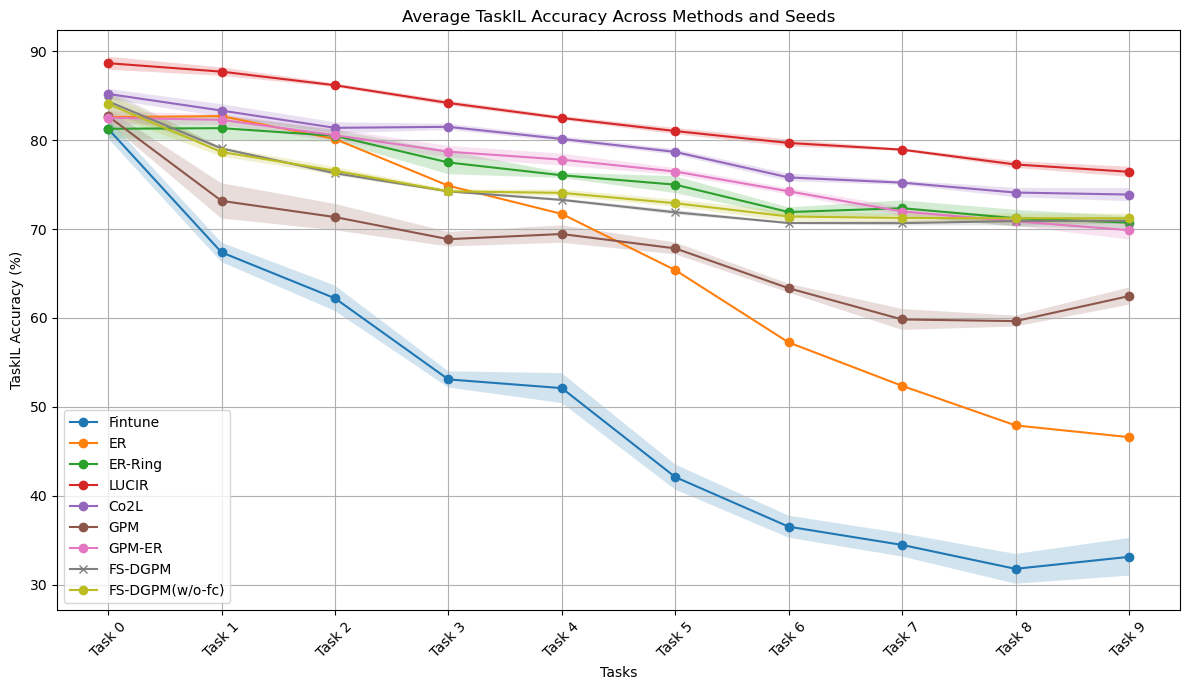

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM-ER': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'FS-DGPM': [
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed0_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed1_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed2_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed3_date2025_04_16/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/surve÷y/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed4_date2025_04_16/exp_log/experiment.log",
    ],
    'FS-DGPM(w/o-fc)': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed0_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed1_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed2_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed3_date2025_04_17/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_cifar100_seed4_date2025_04_17/exp_log/experiment.log",
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        taskil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*TaskIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, taskil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    taskil_acc = float(taskil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        taskil_accuracies.append([])

                    taskil_accuracies[-1].append(taskil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in taskil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    if method_name == "FS-DGPM":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average TaskIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('TaskIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# CIFAR10

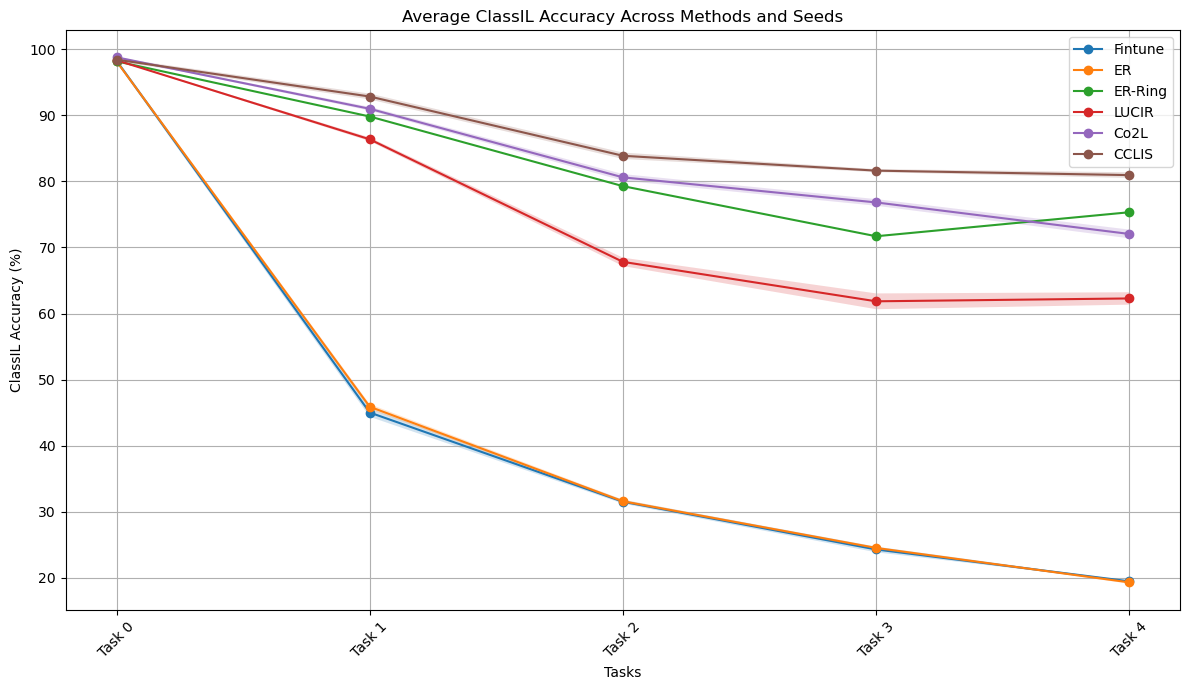

In [25]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed1_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed2_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed3_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed4_date2025_04_12/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed0_date2025_04_19/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed1_date2025_04_19/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed2_date2025_04_19/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed3_date2025_04_19/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed4_date2025_04_19/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed1_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed2_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed3_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed4_date2025_04_12/exp_log/experiment.log',
    ],
    # 'GPM': [
    #     # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed4_date2025_04_14/exp_log/experiment.log',
    # ],
    # 'GPM-Ring': [
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed4_date2025_04_14/exp_log/experiment.log',
    # ],
    'CCLIS': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar10_seed1_date2025_04_20/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar10_seed2_date2025_04_20/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar10_seed3_date2025_04_20/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_cifar10_seed4_date2025_04_20/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    # plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')
    # 各手法の平均精度をプロット
    if method_name == "FS-DGPM":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [26]:
import re
import numpy as np

# 手法ごとのログファイルパス（既に与えられているものを使用）
# method_log_files は省略。既にあなたのコードに含まれています。

# 結果を保存する辞書
final_classil_results = {}

for method_name, log_files in method_log_files.items():
    last_accuracies = []

    for log_file in log_files:
        last_classil_acc = None

        try:
            with open(log_file, 'r') as file:
                for line in file:
                    match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                    if match:
                        _, _, classil_acc = match.groups()
                        last_classil_acc = float(classil_acc)
        except Exception as e:
            print(f"ファイルの読み込みに失敗しました: {log_file}\nエラー: {e}")
            continue

        if last_classil_acc is not None:
            last_accuracies.append(last_classil_acc)

    if last_accuracies:
        mean_acc = np.mean(last_accuracies)
        std_acc = np.std(last_accuracies)
        final_classil_results[method_name] = (mean_acc, std_acc)
    else:
        final_classil_results[method_name] = ("No valid log", "-")

# 結果表示
print("【最終 ClassIL_accuracy 各手法ごと（最終タスク終了時点）】\n")
for method, (mean, std) in final_classil_results.items():
    print(f"{method:15s} : 平均={mean:.2f}%   標準偏差={std:.2f}%" if isinstance(mean, float) else f"{method:15s} : データなし")

【最終 ClassIL_accuracy 各手法ごと（最終タスク終了時点）】

Fintune         : 平均=19.49%   標準偏差=0.03%
ER              : 平均=19.33%   標準偏差=0.20%
ER-Ring         : 平均=75.32%   標準偏差=0.00%
LUCIR           : 平均=62.28%   標準偏差=0.94%
Co2L            : 平均=72.03%   標準偏差=0.66%
CCLIS           : 平均=80.94%   標準偏差=0.43%


# タスク増加

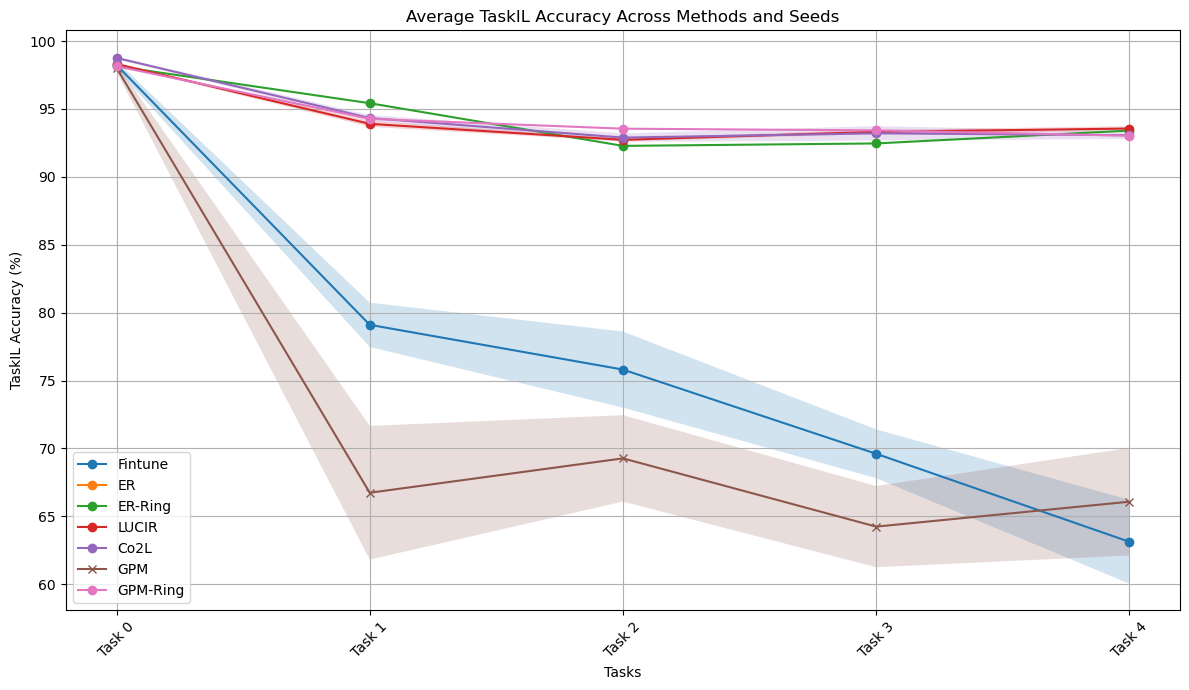

In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed1_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed2_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed3_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed4_date2025_04_12/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed1_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed2_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed3_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed4_date2025_04_12/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed1_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed2_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed3_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed4_date2025_04_12/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar10_seed4_date2025_04_14/exp_log/experiment.log',
    ],
    'GPM-Ring': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar10_seed4_date2025_04_14/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        taskil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*TaskIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, taskil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    taskil_acc = float(taskil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        taskil_accuracies.append([])

                    taskil_accuracies[-1].append(taskil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in taskil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    if method_name == "FS-DGPM" or method_name == "GPM":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average TaskIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('TaskIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# tiny-imagenet

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義（とりあえずseed値5回変更）
method_log_files = {
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_tiny-imagenet_seed0_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_tiny-imagenet_seed1_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_tiny-imagenet_seed2_date2025_04_20/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_tiny-imagenet_seed3_date2025_04_20/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_tiny-imagenet_seed4_date2025_04_20/exp_log/experiment.log",
    ],
    'FS-DGPM': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_tiny-imagenet_seed0_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_tiny-imagenet_seed1_date2025_04_20/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_tiny-imagenet_seed2_date2025_04_20/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_tiny-imagenet_seed3_date2025_04_20/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/fs-dgpm_fs-dgpm_ring2000_tiny-imagenet_seed4_date2025_04_20/exp_log/experiment.log",
    ],
    'LUCIR': [
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_tiny-imagenet_seed0_date2025_04_18/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_tiny-imagenet_seed1_date2025_04_18/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_tiny-imagenet_seed2_date2025_04_18/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_tiny-imagenet_seed3_date2025_04_18/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_tiny-imagenet_seed4_date2025_04_18/exp_log/experiment.log",
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_tiny-imagenet_seed0_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_tiny-imagenet_seed1_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_tiny-imagenet_seed2_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_tiny-imagenet_seed3_date2025_04_16/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_tiny-imagenet_seed4_date2025_04_16/exp_log/experiment.log",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed0_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed1_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed2_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed3_date2025_04_20/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed4_date2025_04_20/exp_log/experiment.log",
    ],
    
    # 'CCLIS': [
    #     "/home/kouyou/ContinualLearning/survey/CIL/logs/cclis/practice_cclis_ring2000_tiny-imagenet_seed0_date2025_04_20/exp_log/experiment.log",
    # ],

}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    print("method_name: ", method_name)

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    # plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')
    # 各手法の平均精度をプロット
    if method_name == "FS-DGPM":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


method_name:  ER
method_name:  FS-DGPM


<ipython-input-36-60ed545c0715>:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_seed_task_accuracies = np.array(all_seed_task_accuracies)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

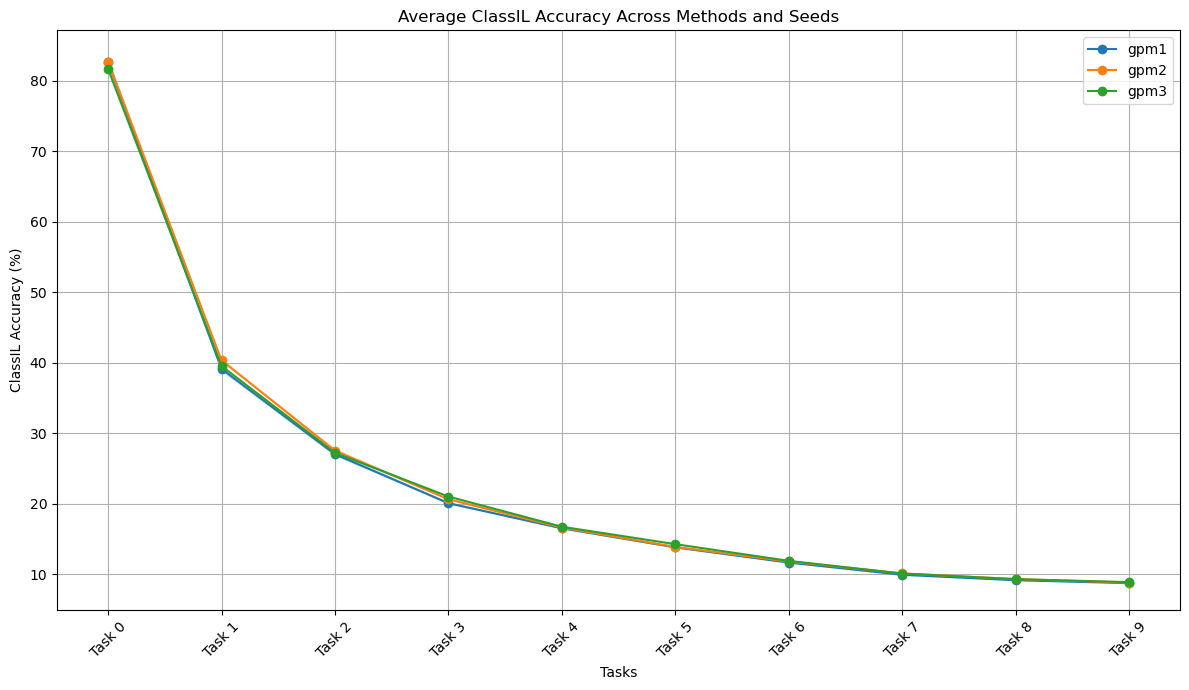

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義（とりあえずseed値5回変更）
method_log_files = {
    'gpm1': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'gpm2': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_11/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_11/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_11/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_11/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_11/exp_log/experiment.log",
    ],
    'gpm3': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_12/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_12/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_12/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_12/exp_log/experiment.log",
        # "/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_12/exp_log/experiment.log",
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


fs-dgpmの比較

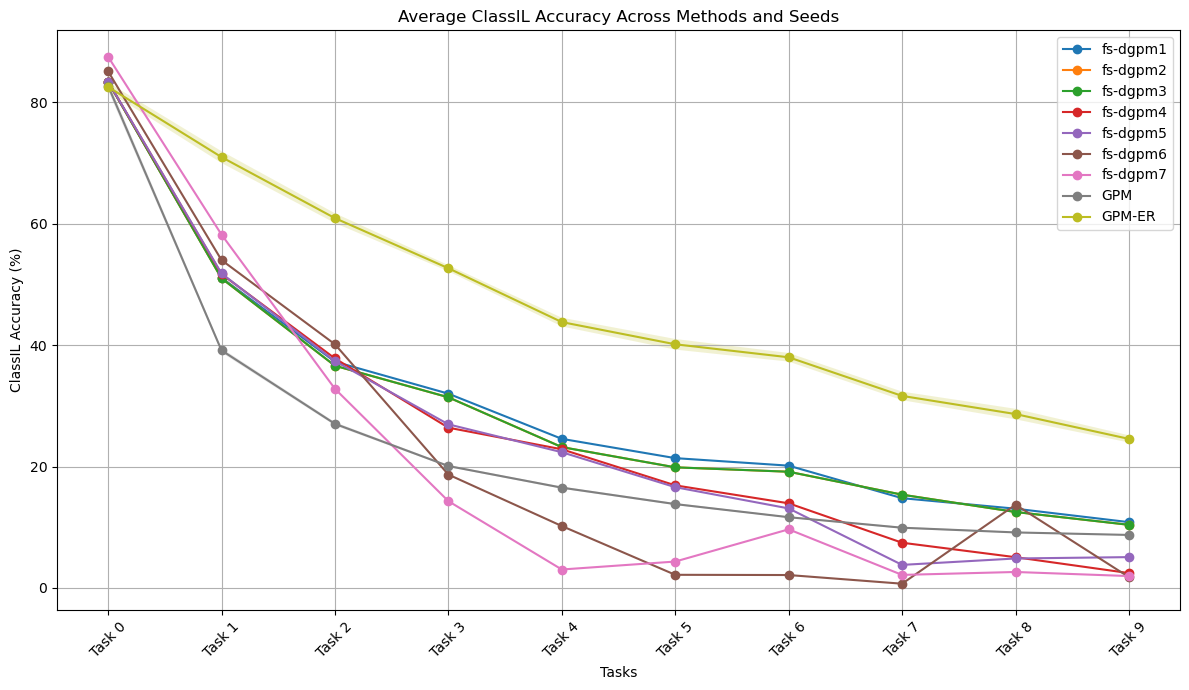

In [8]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義（とりあえずseed値5回変更）
method_log_files = {
    'fs-dgpm1': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm2': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice2_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm3': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice3_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm4': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice4_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'fs-dgpm5': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice5_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'fs-dgpm6': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice6_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'fs-dgpm7': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice7_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM-ER': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


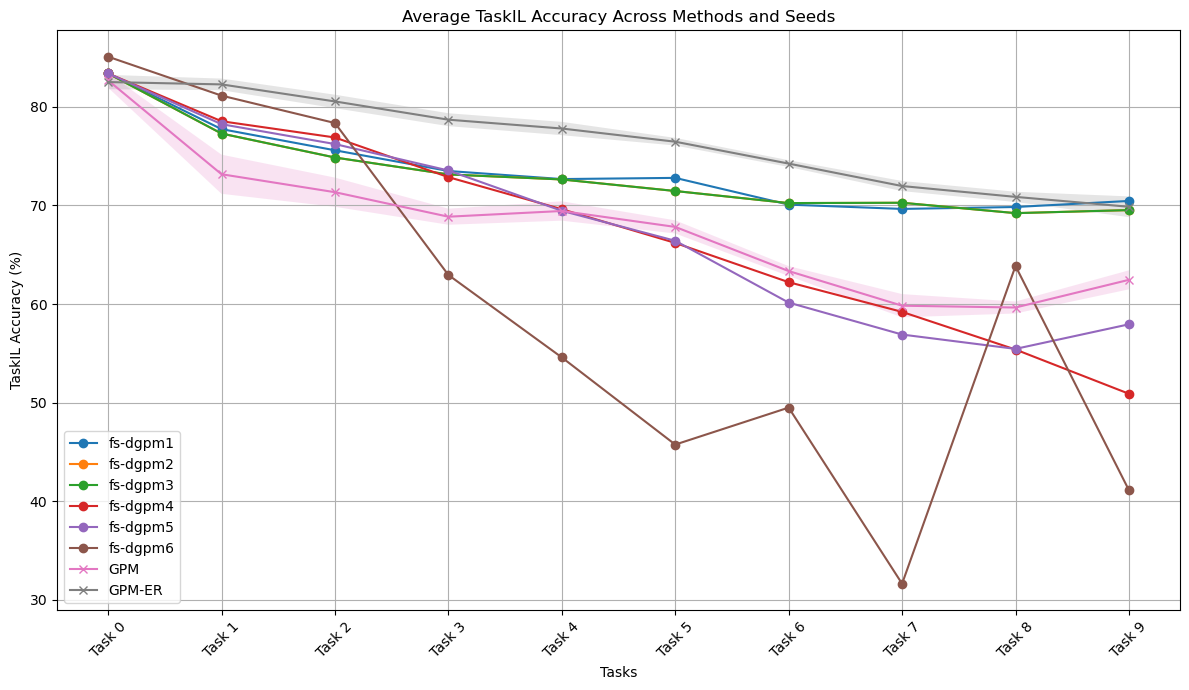

In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'fs-dgpm1': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm2': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice2_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm3': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice3_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log",
    ],
    'fs-dgpm4': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice4_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'fs-dgpm5': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice5_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    'fs-dgpm6': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice6_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    ],
    # 'fs-dgpm7': [
    #     '/home/kouyou/ContinualLearning/survey/CIL/logs/fs-dgpm/practice7_fs-dgpm_ring2000_cifar100_seed0_date2025_04_15/exp_log/experiment.log',
    # ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM-ER': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        taskil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*TaskIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, taskil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    taskil_acc = float(taskil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        taskil_accuracies.append([])

                    taskil_accuracies[-1].append(taskil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in taskil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    if method_name == "GPM" or method_name == "GPM-ER":
        plt.plot(task_indices, mean_accuracies, marker='x', linestyle='-', label=f'{method_name}')
    else:
        plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average TaskIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('TaskIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()